In [1]:
import os                   #trabalhar com os arquivos
import numpy as np          #analise dos dados 
import pandas as pd         #analise dos dados
import seaborn as sns       #gerando grafico
from scipy import stats
from meus.printer import *
from datetime import datetime  #modificando datas
import matplotlib.pyplot as plt #gerando grafico

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-26'

In [2]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> artigo
2 -> caso_full.csv
3 -> cities.csv
4 -> covid19_municipios.csv
5 -> COVID19_REGIOES BR.csv
6 -> Dados_demográficos_municípios.xlsx
7 -> Dados_demográficos_municípios_new.xlsx
8 -> Datalab_COVID.pptx
9 -> figures
10 -> idade.xlsx
11 -> obito_cartorio.csv
12 -> População residente municipal x população faixa etária.csv
13 -> População residente por estado - 2015.csv
14 -> População residente x sexo.csv
15 -> results


In [3]:
date = 2
df =  pd.read_csv('..\\'+directory[date])
df.tail()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
26577,NaN,43.0,2020-04-22,11377239.0,False,True,970,8.52579,2020-04-22,0.0289,28,state,RS,52,1
26578,NaN,42.0,2020-04-22,7164788.0,False,True,1115,15.56222,2020-04-22,0.0350,39,state,SC,24,2
26579,NaN,28.0,2020-04-22,2298696.0,False,True,118,5.13335,2020-04-22,0.0593,7,state,SE,1,0
26580,NaN,35.0,2020-04-22,45919049.0,False,True,15914,34.65664,2020-04-22,0.0713,1134,state,SP,529,41
26581,NaN,17.0,2020-04-22,1572866.0,False,True,37,2.35239,2020-04-22,0.0541,2,state,TO,1,0


In [4]:
# df_cities = pd.DataFrame()
# g_population = df.groupby('city')
# df_cities['City'] = g_population.sum().index
# df_cities['Population'] = g_population['estimated_population_2019'].median().values
# df_cities['Confirmed'] = g_population['last_available_confirmed'].sum().values
# df_cities['Deaths'] = g_population['last_available_deaths'].sum().values
# df_cities['Confirmed/100k'] = g_population['last_available_confirmed_per_100k_inhabitants'].sum().values
# df_cities['Death rate'] = g_population['last_available_death_rate'].sum().values
# df = df_cities
# df.head()

In [5]:
df = df[(df['date'] == '2020-04-10') & (df['place_type'] == 'city')][[
    "city",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df = df.rename(columns={
    "estimated_population_2019": "Population",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
    "last_available_death_rate": "Death Rate",
    "city": "City"
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 10115 to 11034
Data columns (total 6 columns):
City              920 non-null object
Population        906 non-null float64
Confirmed         920 non-null int64
Deaths            920 non-null int64
Confirmed-100k    891 non-null float64
Death Rate        210 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ KB


In [6]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 10115 to 11034
Data columns (total 6 columns):
City              920 non-null object
Population        920 non-null float64
Confirmed         920 non-null int64
Deaths            920 non-null int64
Confirmed-100k    920 non-null float64
Death Rate        920 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ KB


In [7]:
# df['City'].to_csv('cities.csv', header=['City'])

In [8]:
g = 1
print_campo = 'n'
col1 = 'Population'
col2 = 'Confirmed-100k'
col3 = 'Death Rate'
plt.rcParams.update({'font.size': 15})
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
try:
    if print_campo == 's':
        os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory created


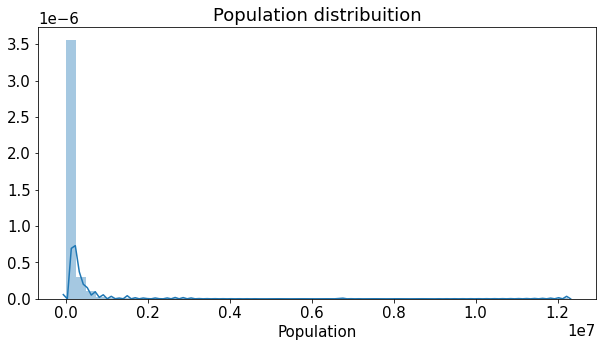

In [9]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col1]
)
plt.title(col1 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

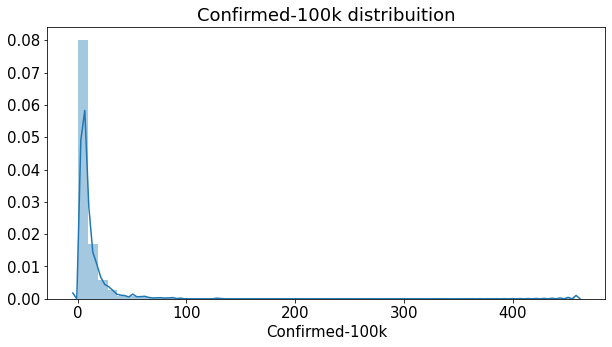

In [10]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col2]
)
plt.title(col2 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

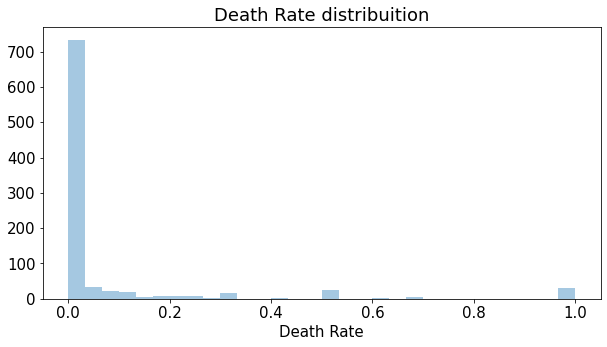

In [11]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col3],
    kde=False
)
plt.title(col3 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col3+'_'+data+'.png', dpi=150)

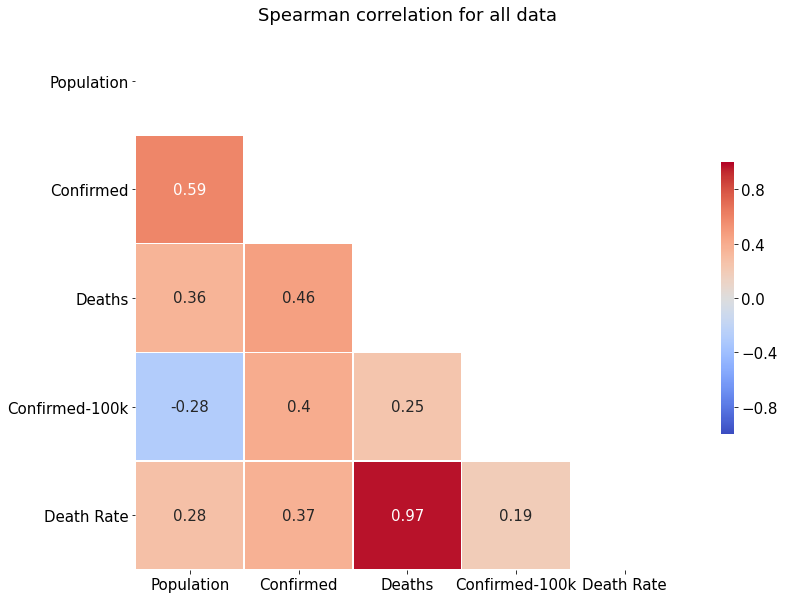

In [12]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

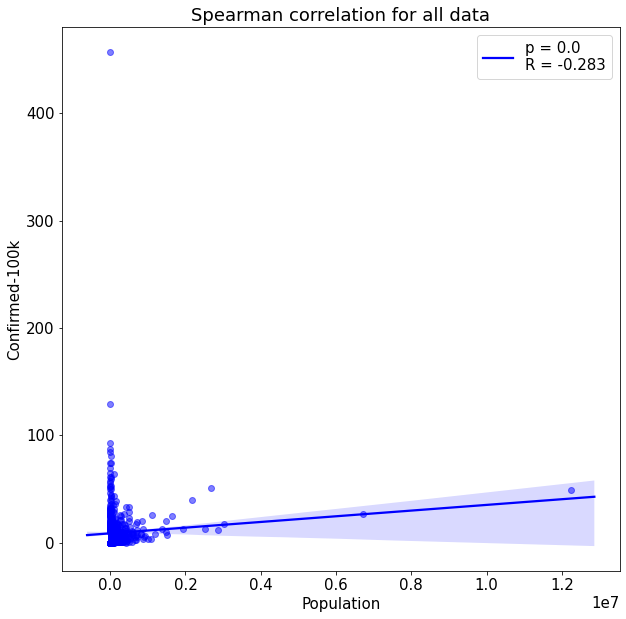

In [13]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df,
    color='b',
    scatter_kws={'alpha':0.5},
    label=[col2],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col2)
pear_pos_col2 = stats.spearmanr(df[col1], df[col2])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col2[1], round_size)) + '\nR = ' + str(round(pear_pos_col2[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

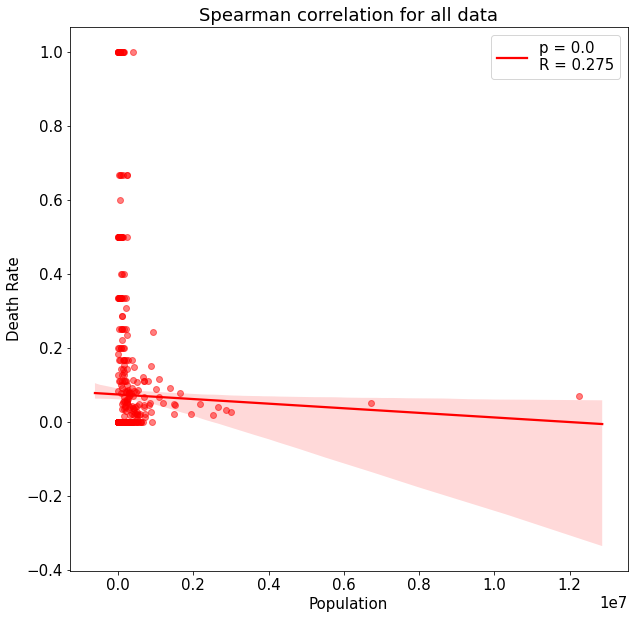

In [14]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col3,
    data=df,
    color='r',
    scatter_kws={'alpha':0.5},
    label=[col3],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col3)
pear_pos_col3 = stats.spearmanr(df[col1], df[col3])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col3[1], round_size)) + '\nR = ' + str(round(pear_pos_col3[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

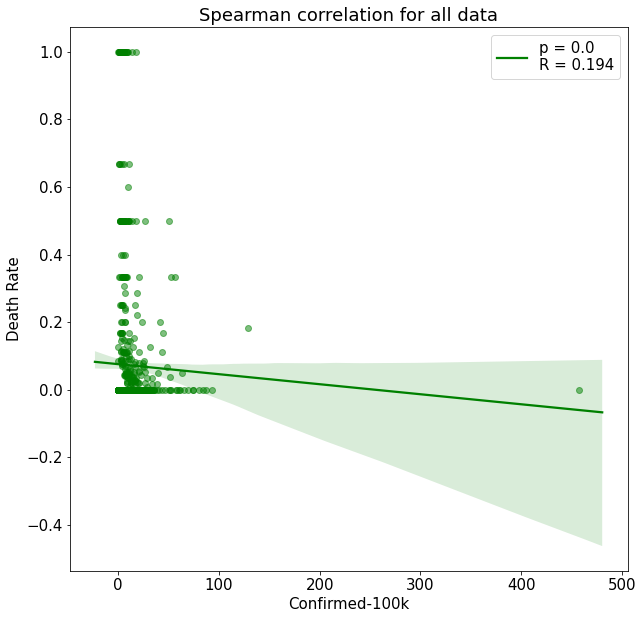

In [15]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col2,
    y=col3,
    data=df,
    color='g',
    scatter_kws={'alpha':0.5},
    label=[col3],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col3)
pear_pos_col3 = stats.spearmanr(df[col2], df[col3])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col3[1], round_size)) + '\nR = ' + str(round(pear_pos_col3[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [16]:
df = df[(df[col1] < 6000000) & (df[col2] < 70) & (df[col3] < 0.75)]

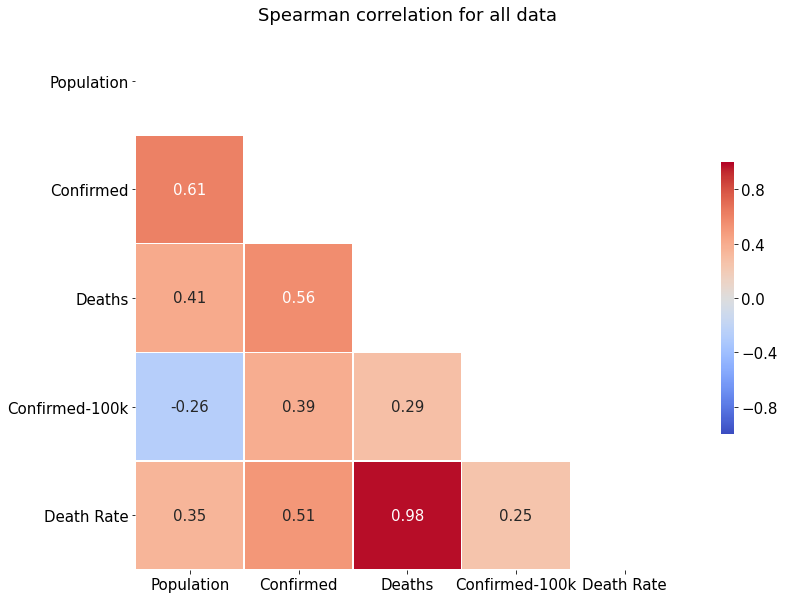

In [17]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

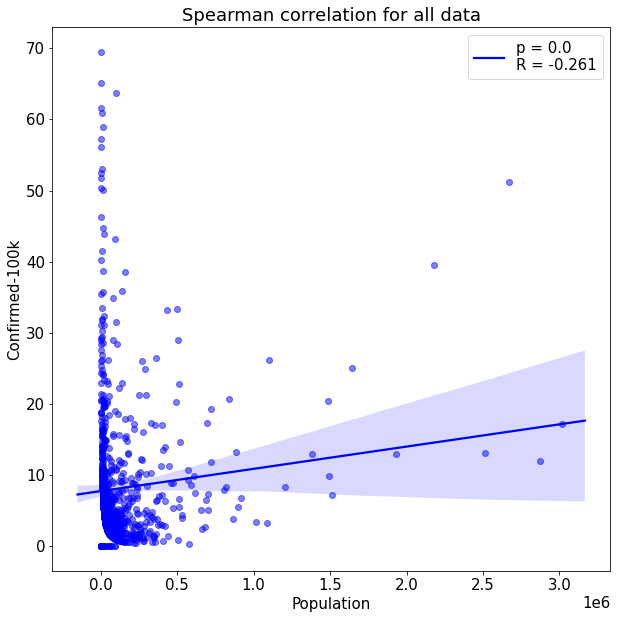

In [18]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df,
    color='b',
    scatter_kws={'alpha':0.5},
    label=[col2],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col2)
pear_pos_col2 = stats.spearmanr(df[col1], df[col2])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col2[1], round_size)) + '\nR = ' + str(round(pear_pos_col2[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

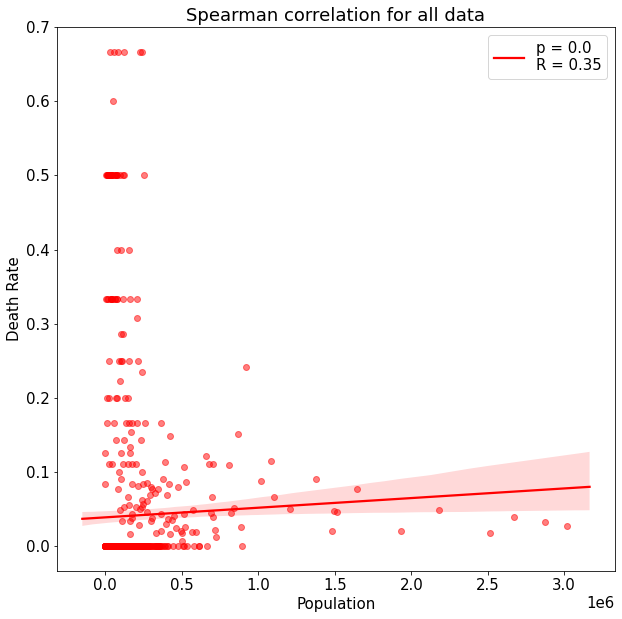

In [19]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col3,
    data=df,
    color='r',
    scatter_kws={'alpha':0.5},
    label=[col3],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col3)
pear_pos_col3 = stats.spearmanr(df[col1], df[col3])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col3[1], round_size)) + '\nR = ' + str(round(pear_pos_col3[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col3+'_'+data+'.png', dpi=150)

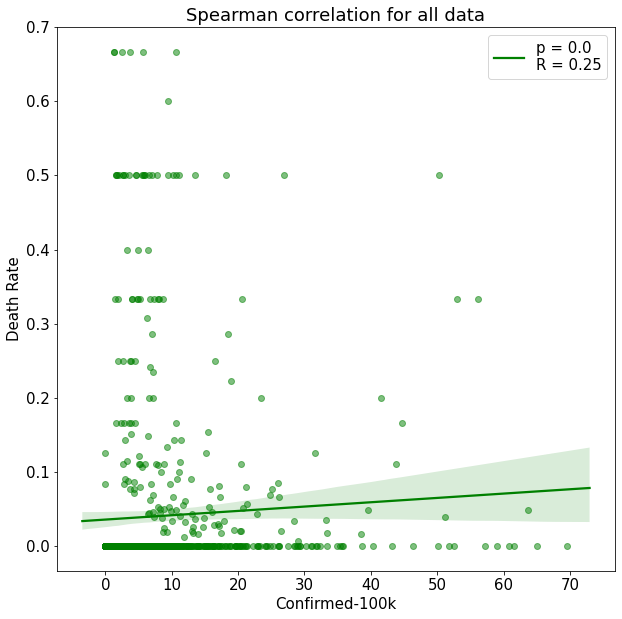

In [20]:
g += 1
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col2,
    y=col3,
    data=df,
    color='g',
    scatter_kws={'alpha':0.5},
    label=[col3],
)
plt.title('Spearman correlation for all data')
plt.ylabel(col3)
pear_pos_col3 = stats.spearmanr(df[col2], df[col3])
round_size = 3
plt.legend(
    [
        'p = ' + str(round(pear_pos_col3[1], round_size)) + '\nR = ' + str(round(pear_pos_col3[0], round_size)),
    ]
)
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [21]:
minimus = df[col1].min()
maximus = df[col1].max()
q2 = df[col1].median()
q1 = df[df[col1] < q2][col1].median()
q3 = df[df[col1] > q2][col1].median()
qi = q3 - q1
minor = q1 - (qi * 1.5)
major = q3 + (qi * 1.5)
list_quartil = {
    'minimus': minimus,
    'minor': minor,
    'q1': q1,
    'q2': q2,
    'q3': q3,
    'major': major,
    'maximus': maximus,
    'qi': qi
}
for k, v in list_quartil.items():
    print(f'{k} - {v}')

minimus - 0.0
minor - -138719.5
q1 - 22688.0
q2 - 54704.0
q3 - 130293.0
major - 291700.5
maximus - 3015268.0
qi - 107605.0
